In [1]:
#importing and aliasing(if needed) the libraries needed
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
tf.__version__ # just to see my tensorflow version

'1.12.0'

In [3]:
mnist = tf.keras.datasets.mnist #loading my dataset from keras' inbuilt mnist dataset which are handwritten english math digits from 0 to 9

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #loading the structured data which are divided into four columns and first two are training and last two are testing columns

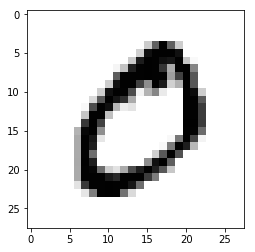

In [5]:
plt.imshow(x_train[1], cmap = plt.cm.binary) #too see what is in the x_train index no. 0 in black and white format
plt.show() #showing the data

In [6]:
print(x_train[1]) # just to see what are the values inside the x_train[1] tensor

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [7]:
#normalizing data

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis = 1) #normalizing the data from 0 to 1 value for this project
x_test = tf.keras.utils.normalize(x_test, axis = 1)

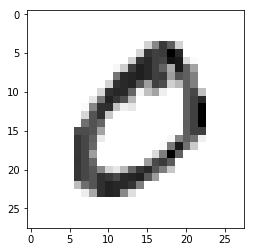

In [9]:
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show() #now again observing the image which will be slightly blurry as normalized

In [10]:
print(x_train[0]) #you can see the normalized values

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
model = tf.keras.models.Sequential() #feeding what type of model i am going to use and keeping it to the model object
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #flattening the input layer as our input layer is 128*128 tensor but it is easier for computers to read from 1 dimensional column vector
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #the first hidden layer with the relu activation function; max(0, z)
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #the second hidden layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #now the last output layer. as our output should be 0 to 9 any of them that is why 10 is the total output neuron and we are using softmax function for the output unit
#optimizer, loss function, and the metrics
model.compile(optimizer = 'adam', #they are adam optimizer which is an advanced version of gradient descent.
              loss = 'sparse_categorical_crossentropy', #determining the loss of accuracy by sparse categorical crossentropy function.
              metrics = ['accuracy']) #the mesurement we will find is accuracy

model.fit(x_train, y_train, epochs = 3) #now it will start training according to the batch size or iteration steps which is called epoch, here 3 is the epoch size

Epoch 1/3
60000/60000 [==============================] - 7s 116us/step - loss: 0.2612 - acc: 0.9234
Epoch 2/3
60000/60000 [==============================] - 6s 95us/step - loss: 0.1106 - acc: 0.9654
Epoch 3/3
60000/60000 [==============================] - 6s 95us/step - loss: 0.0743 - acc: 0.9767


In [12]:
val_loss, val_acc = model.evaluate(x_test, y_test) #evaluating the model accuracy
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 47us/step
0.08720663674511016 0.9742


In [13]:
model.save('mnist_digit_recognition.model') #saving the model

In [14]:
#loading the saved model and then testing from it
load_mnist = load_model('mnist_digit_recognition.model')
test = load_mnist.predict(x_test)
print(np.argmax(test[0]))

7


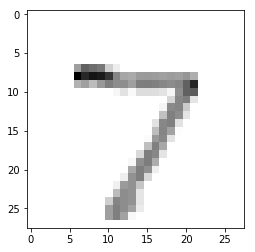

In [15]:
#to see what the data was actually in the dataset
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()